<a href="https://colab.research.google.com/github/luuvu1396/DA_CODEgym/blob/main/%5BTh%E1%BB%B1c_h%C3%A0nh%5D_v%E1%BA%BD_bi%E1%BB%83u_%C4%91%E1%BB%93_n%C3%A2ng_cao_v%E1%BB%9Bi_b%E1%BB%99_d%E1%BB%AF_li%E1%BB%87u_Online_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("/content/OnlineRetail.csv",encoding = "ISO-8859-1")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [19]:
df = df.dropna()

In [20]:
df["Price"] = df["Quantity"] * df["UnitPrice"]

<ipython-input-20-728e8dcafc44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price"] = df["Quantity"] * df["UnitPrice"]


<Axes: ylabel='UnitPrice'>

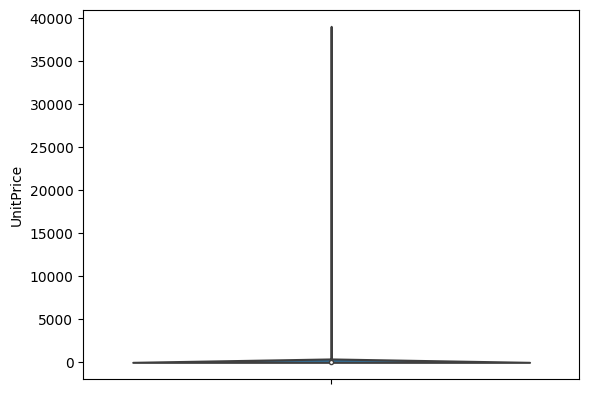

In [21]:
# Vẽ biểu đồ phân bố
# Biểu đồ phân bố cho giá sản phẩm\
sns.violinplot(y = "UnitPrice", data=df)

<Axes: ylabel='Price'>

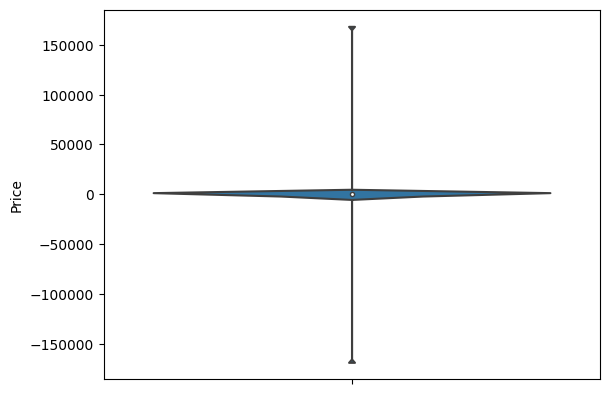

In [22]:
# Có thể nhận thấy dữ liệu phân bố không được đều, nhiều
# sản phẩm giá thấp và ít sản phẩm giá cao.
# Biểu đồ phân bố cho tổng giá mỗi sản phẩm ở các đơn
sns.violinplot(y = "Price", data=df)

In [23]:
# Tính số lượng sản phẩm ở mỗi đơn hàng
df2 = df.groupby(['InvoiceNo'])['Quantity'].sum().reset_index()
df2

,InvoiceNo,Quantity
0,536365,40
1,536366,12
2,536367,83
3,536368,15
4,536369,3
...,...,...
22185,C581484,-80995
22186,C581490,-23
22187,C581499,-1
22188,C581568,-5


<Axes: ylabel='Quantity'>

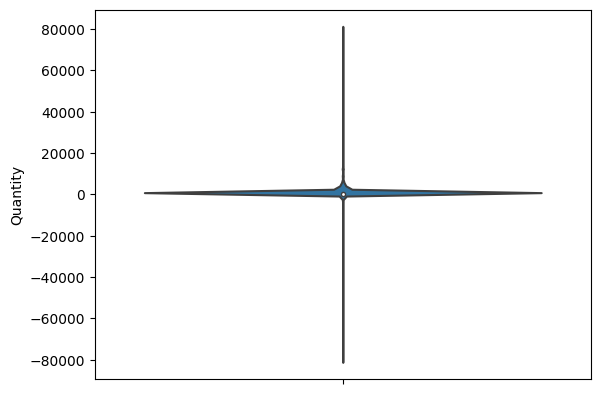

In [24]:
# Biểu đồ phân bố số lượng sản phẩm trên mỗi đơn
sns.violinplot(y="Quantity", data=df2)

In [25]:
df3 = df.groupby(['Country'])['Quantity'].sum().reset_index()

In [26]:
# Loại bỏ dữ liệu về hóa đơn trùng lặp
df1 = df.drop_duplicates(subset = 'InvoiceNo')

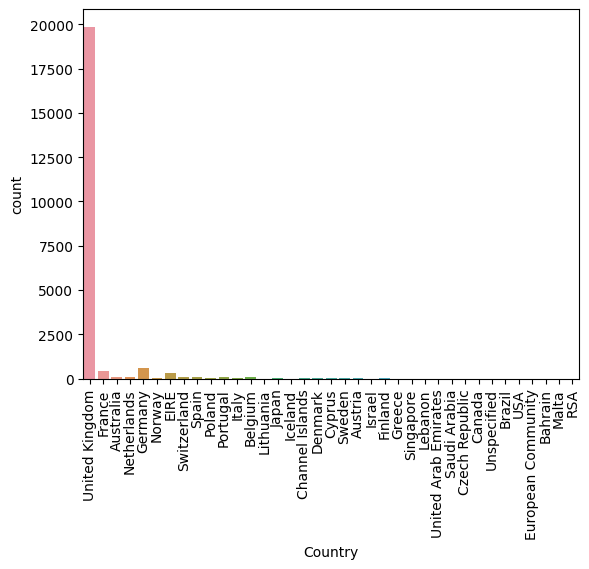

In [31]:
sns.countplot(x = "Country", data = df1)
# quay title
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.show()

Có thể nhận thấy rằng số sản phẩm và số hóa đơn được mua rất nhiều ở Anh, áp đảo so với phần còn lại

<Axes: xlabel='UnitPrice'>

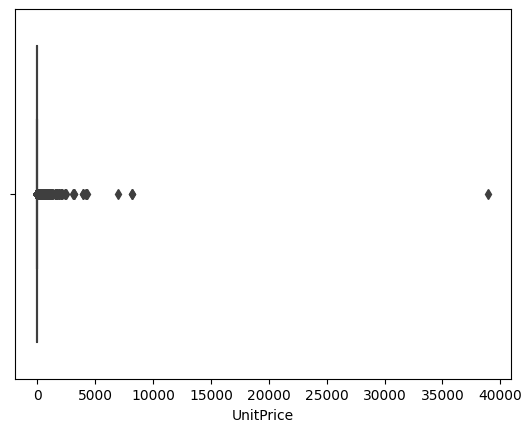

In [32]:
# Vẽ biểu đồ box plot
# Vẽ biểu đồ box plot cho thuộc tính giá sản phẩm
sns.boxplot(x=df["UnitPrice"])

<Axes: xlabel='Quantity'>

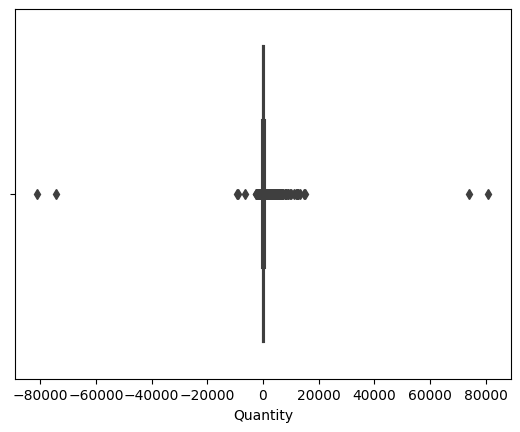

In [33]:
# Tương tự như trên đã nhận xét, giá sản phẩm phân bố rất không đồng đều, tập trung ở giá thấp
# Biểu đồ box plot cho số lượng sản phẩm mỗi đơn
sns.boxplot(x=df2["Quantity"])